In [1]:
from sklearn import svm

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [4]:
with open('svm-data.csv') as f:
    data = pd.read_csv(f, names = ['y', 'x1', 'x2'])

In [52]:
data

,y,x1,x2
0,0,0.70,0.29
1,1,0.23,0.55
2,0,0.72,0.42
3,0,0.98,0.68
4,0,0.48,0.39
5,1,0.34,0.73
6,0,0.44,0.06
7,1,0.40,0.74
8,0,0.18,0.18
9,1,0.53,0.53


In [20]:
svc = svm.SVC(C=100000,random_state=241, kernel='linear')

In [32]:
[[data.x1[i], data.x2[i]] for i in data.index]

[[0.69999999999999996, 0.28999999999999998],
 [0.23000000000000001, 0.55000000000000004],
 [0.71999999999999997, 0.41999999999999998],
 [0.97999999999999998, 0.68000000000000005],
 [0.47999999999999998, 0.39000000000000001],
 [0.34000000000000002, 0.72999999999999998],
 [0.44, 0.059999999999999998],
 [0.40000000000000002, 0.73999999999999999],
 [0.17999999999999999, 0.17999999999999999],
 [0.53000000000000003, 0.53000000000000003]]

In [33]:
svc.fit([[data.x1[i], data.x2[i]] for i in data.index], data.y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
vectors = svc.support_vectors_

In [53]:
vectors

array([[ 0.98,  0.68],
       [ 0.48,  0.39],
       [ 0.53,  0.53]])

In [54]:
len(vectors) and 

3

In [85]:
indexes = [data[data.x1 == vectors[i][0]].index.tolist() for i in range(len(vectors))]

In [100]:
print str(indexes[x][0]) + ' ' for x in range(len(indexes))

SyntaxError: invalid syntax (<ipython-input-100-38760ea4e274>, line 1)

In [120]:
"".join(['t' for x in xrange(3)])

'ttt'

In [140]:
with open('ans1', 'w') as f:
    line = "".join([str(data[data.x1 == vectors[i][0]].index.tolist()[0]+1) + " " for i in xrange(len(vectors))])
    f.write(line[:-1])

In [141]:
%less ans1

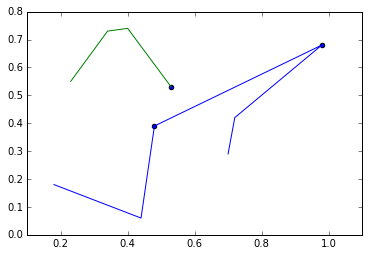

In [46]:
vectors_trans = svc.support_vectors_.transpose()
data0 = data[data.y == 0]
data1 = data[data.y == 1]
l0 = plt.plot(data0.x1, data0.x2)
l1 = plt.plot(data1.x1, data1.x2)
s = plt.scatter(vectors_trans[0], vectors_trans[1])
plt.show()